In [ ]:
#| hide
!pip install -Uqq nixtla

In [ ]:
#| hide 
from nixtla.utils import in_colab

In [ ]:
#| hide 
IN_COLAB = in_colab()

In [ ]:
#| hide
if not IN_COLAB:
    from nixtla.utils import colab_badge
    from dotenv import load_dotenv

# Add date features

If your dataset lacks exogenous variables, add date features to inform the model for anomaly detection. Use the `date_features` argument. Set it to `True` to extract all possible features, or pass a list of specific features to include.

In [ ]:
#| echo: false
if not IN_COLAB:
    load_dotenv()
    colab_badge('docs/capabilities/anomaly-detection/03_anomaly_detection_date_features')

[![](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Nixtla/nixtla/blob/main/nbs/docs/capabilities/anomaly-detection/03_anomaly_detection_date_features.ipynb)

In [ ]:
import pandas as pd
from nixtla import NixtlaClient

In [ ]:
nixtla_client = NixtlaClient(
    # defaults to os.environ.get("NIXTLA_API_KEY")
    api_key = 'my_api_key_provided_by_nixtla'
)

> 👍 Use an Azure AI endpoint
> 
> To use an Azure AI endpoint, set the `base_url` argument:
> 
> `nixtla_client = NixtlaClient(base_url="you azure ai endpoint", api_key="your api_key")`

In [ ]:
#| hide
if not IN_COLAB:
    nixtla_client = NixtlaClient()

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Using the following exogenous features: ['month_1.0', 'month_2.0', 'month_3.0', 'month_4.0', 'month_5.0', 'month_6.0', 'month_7.0', 'month_8.0', 'month_9.0', 'month_10.0', 'month_11.0', 'month_12.0', 'year_2007.0', 'year_2008.0', 'year_2009.0', 'year_2010.0', 'year_2011.0', 'year_2012.0', 'year_2013.0', 'year_2014.0', 'year_2015.0', 'year_2016.0']
INFO:nixtla.nixtla_client:Calling Anomaly Detector Endpoint...


<Axes: ylabel='features'>

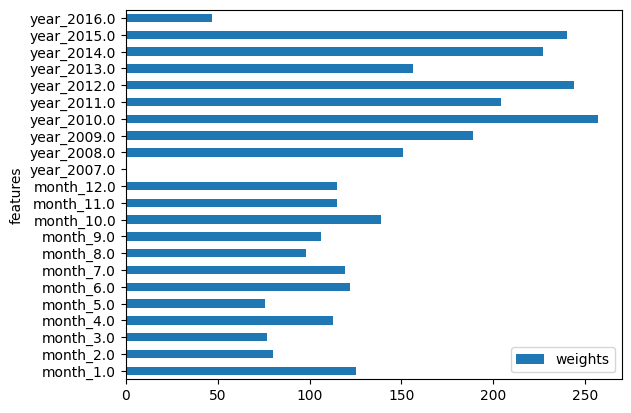

In [ ]:
# Read the data
df = pd.read_csv('https://datasets-nixtla.s3.amazonaws.com/peyton-manning.csv')

# Add date features for anomaly detection
# Here, we use date features at the month and year levels
anomalies_df_x = nixtla_client.detect_anomalies(
    df,
    freq='D', 
    date_features=['month', 'year'],
    date_features_to_one_hot=True,
    level=99.99,
)

# Plot weights of date features
nixtla_client.weights_x.plot.barh(x='features', y='weights')

> 📘 Available models in Azure AI
>
> If you use an Azure AI endpoint, set `model="azureai"`
>
> `nixtla_client.detect_anomalies(..., model="azureai")`
>
> For the public API, two models are supported: `timegpt-1` and `timegpt-1-long-horizon`.
> 
> By default, `timegpt-1` is used. See [this tutorial](https://docs.nixtla.io/docs/tutorials-long_horizon_forecasting) for details on using `timegpt-1-long-horizon`.

For more details, check out our in-depth tutorial on [anomaly detection](https://docs.nixtla.io/docs/tutorials/anomaly_detection).